<a href="https://colab.research.google.com/github/gurusurya946/FML/blob/main/Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/Invistico_Airline.csv')

In [4]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3.0,5.0,3.0,2.0,0.0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4.0,2.0,3.0,2.0,310.0,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4.0,4.0,4.0,2.0,0.0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1.0,4.0,1.0,3.0,0.0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2.0,4.0,2.0,5.0,0.0,0.0


In [5]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,11063.000000,11063.000000,11063.000000,11063.000000,11063.000000,11063.000000,11063.000000,11063.000000,11063.000000,11063.000000,11063.000000,11063.000000,11062.000000,11062.000000,11062.000000,11062.000000,11062.000000,11008.000000
mean,38.347103,1809.906806,1.867757,3.075658,1.882401,2.932206,3.122390,2.491729,3.376661,3.096448,3.186025,3.144536,3.439342,3.363316,3.464563,3.260351,15.054330,15.305233
std,18.561106,865.533231,1.517616,1.582244,1.568136,1.208852,1.347178,1.674114,1.359973,1.251652,1.208329,1.330622,1.144508,1.243474,1.124780,1.310359,41.937745,42.212604
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,1276.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38.000000,1823.000000,1.000000,3.000000,1.000000,3.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,54.000000,2305.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,13.000000,13.000000
max,70.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
data.isnull().sum()

satisfaction                          0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Seat comfort                          0
Departure/Arrival time convenient     0
Food and drink                        0
Gate location                         0
Inflight wifi service                 0
Inflight entertainment                0
Online support                        0
Ease of Online booking                0
On-board service                      0
Leg room service                      0
Baggage handling                      1
Checkin service                       1
Cleanliness                           1
Online boarding                       1
Departure Delay in Minutes            1
Arrival Delay in Minutes             55
dtype: int64

In [7]:

data['satisfaction']=data['satisfaction'].replace('satisfied',1)
data['satisfaction']=data['satisfaction'].replace('dissatisfied',0)
print(data['satisfaction'])

0        1
1        1
2        1
3        1
4        1
        ..
11058    1
11059    1
11060    1
11061    1
11062    0
Name: satisfaction, Length: 11063, dtype: int64


In [8]:
data['Gender']=data['Gender'].replace('Male',1)
data['Gender']=data['Gender'].replace('Female',0)
print(data['Gender'])

0        0
1        1
2        0
3        0
4        0
        ..
11058    0
11059    0
11060    0
11061    0
11062    1
Name: Gender, Length: 11063, dtype: int64


In [9]:

data['Customer Type']=data['Customer Type'].replace('Loyal Customer',1)
data['Customer Type']=data['Customer Type'].replace('disloyal Customer',0)
print(data['Customer Type'])

0        1
1        1
2        1
3        1
4        1
        ..
11058    1
11059    1
11060    1
11061    1
11062    1
Name: Customer Type, Length: 11063, dtype: int64


In [10]:
data['Class']=data['Class'].replace('Eco',1)
data['Class']=data['Class'].replace('Business',0)
data['Class']=data['Class'].replace('Eco Plus',2)
data['Class']

0        1
1        0
2        1
3        1
4        1
        ..
11058    1
11059    2
11060    1
11061    2
11062    1
Name: Class, Length: 11063, dtype: int64

In [11]:
data['Type of Travel']=data['Type of Travel'].replace('Personal Travel',1)
data['Type of Travel']=data['Type of Travel'].replace('Business travel',0)

In [12]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,65,1,1,265,0,0,0,...,2,3,3,0,3.0,5.0,3.0,2.0,0.0,0.0
1,1,1,1,47,1,0,2464,0,0,0,...,2,3,4,4,4.0,2.0,3.0,2.0,310.0,305.0
2,1,0,1,15,1,1,2138,0,0,0,...,2,2,3,3,4.0,4.0,4.0,2.0,0.0,0.0
3,1,0,1,60,1,1,623,0,0,0,...,3,1,1,0,1.0,4.0,1.0,3.0,0.0,0.0
4,1,0,1,70,1,1,354,0,0,0,...,4,2,2,0,2.0,4.0,2.0,5.0,0.0,0.0


In [13]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean(),inplace=True)
data['Baggage handling'].fillna(data['Baggage handling'].mean(),inplace=True)
data['Checkin service'].fillna(data['Checkin service'].mean(),inplace=True)
data['Cleanliness'].fillna(data['Cleanliness'].mean(),inplace=True)
data['Online boarding'].fillna(data['Online boarding'].mean(),inplace=True)
data['Departure Delay in Minutes'].fillna(data['Departure Delay in Minutes'].mean(),inplace=True)

In [14]:
data.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [15]:

X=data.drop('satisfaction',axis=1).values
y=data['satisfaction'].values
print(X)

[[  0.           1.          65.         ...   2.           0.
    0.        ]
 [  1.           1.          47.         ...   2.         310.
  305.        ]
 [  0.           1.          15.         ...   2.           0.
    0.        ]
 ...
 [  0.           1.          39.         ...   4.           6.
   51.        ]
 [  0.           1.          15.         ...   1.          23.
   16.        ]
 [  1.           1.          16.         ...   3.26035075  15.05433014
   15.30523256]]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=42)

In [17]:
X_train.reshape(-1,1)
y_train.reshape(-1,1)
reg=LogisticRegression(C=0.5)
reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [18]:
reg.coef_

array([[-1.81560241e+00,  1.27040215e-03, -1.61463607e-02,
         1.27040215e-03,  7.61473917e-02, -5.62102411e-04,
         5.68702516e-02,  1.17164107e-01, -4.14891199e-01,
        -2.35804708e-01, -7.80657065e-02,  9.99249302e-01,
         2.30492254e-01, -1.79630970e-01,  2.94534884e-01,
         2.66005502e-02, -2.66827795e-02,  3.48221072e-01,
        -7.31400934e-02, -5.74058689e-02,  2.74020702e-04,
        -2.13220287e-02]])

In [19]:
reg.intercept_scaling

1

In [20]:
reg.predict_proba(X_train)

array([[0.66880806, 0.33119194],
       [0.14010278, 0.85989722],
       [0.79148673, 0.20851327],
       ...,
       [0.88413459, 0.11586541],
       [0.83841734, 0.16158266],
       [0.39978708, 0.60021292]])

In [21]:
y_predict=reg.predict(X_test)
print(y_predict)

[0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0
 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0
 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0]


In [22]:
reg.score(X_test, y_test)

0.9099099099099099

In [23]:
confusion_matrix(y_test,y_predict)

array([[ 99,   6],
       [ 14, 103]])

In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       105
           1       0.94      0.88      0.91       117

    accuracy                           0.91       222
   macro avg       0.91      0.91      0.91       222
weighted avg       0.91      0.91      0.91       222



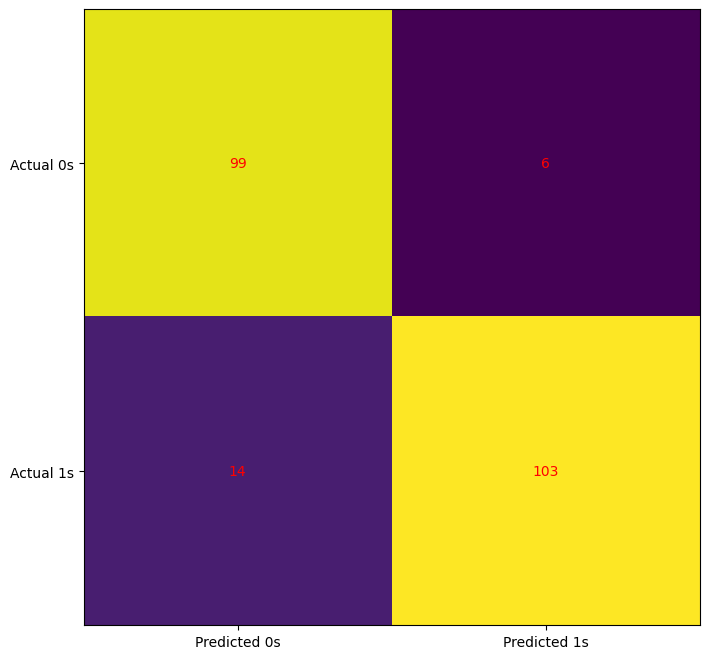

In [25]:
cm=confusion_matrix(y_test,y_predict)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()